## Getting Started

This project is my implementation of a kaggle competition:
[https:www.kaggle.com/c/air-ticket-fare-prediction]

Sadly, now the competition is **exclusive to invited users by kaggle**,
but you can download the dataset from kaggle datasets.

I decided to solve this problem as a proof of understanding Machine Learning workflow and Regression techniques in specific.

Kaggle Evaluation metric for predictor : Root Mean Squared Error 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import necessary libararies
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_style('whitegrid')

In [4]:
# Sklearn Imports
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
# check current working directory
print(os.getcwd())
# change working directory (r convert string to raw string)
os.chdir('/content/drive/MyDrive/Colab Notebooks/flight_fare_dataset')

/content


In [6]:
# Load training and testing data
train_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/flight_fare_dataset/Data_Train.xlsx')
test_data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/flight_fare_dataset/Test_set.xlsx')

## EDA

In [7]:
# Train of Thoughts
# Take a look at training and testing data --> .head()
# check columns and their dtypes --> .info()
# check null counts in both sets --> .isna().sum()
# Remove nulls or Impute them?
# Histograms for numerical variables --> normal distribution or skewed
# If so, need scaling or not ? --> depends on type of regressor we use.
# Bar charts for categorical variables
# relationships between features and price.
# Insights from EDA ...

In [8]:
# Take a look at the data
print(train_data.head())
print('-' * 80)
print(test_data.head())

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  
--------------------------------------------------------------------------------
             Airli

In [9]:
# check data types and number of entries
print(train_data.info())
print('-' * 45)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   

In [10]:
train_data.Airline.value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [11]:
# check null values count
print(train_data.isna().sum())
print('-' *20)
print(test_data.isna().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64
--------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [12]:
# only 2 nulls from training data, drop them.
train_data.dropna(inplace = True)
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

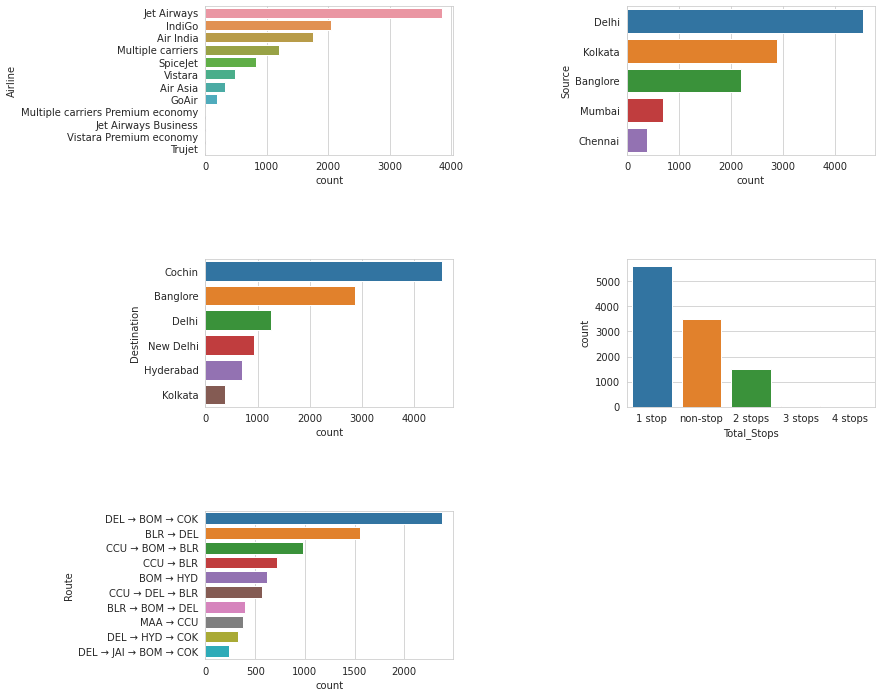

In [13]:
# Visualizing our features
fig, axs = plt.subplots(3 , 2, figsize = (12, 12))
plt.subplots_adjust(hspace= 0.7, wspace = 0.7)
sns.countplot(y = 'Airline', data = train_data,
              order = train_data['Airline'].value_counts().index, ax = axs[0, 0])
sns.countplot(y = 'Source', data = train_data,
              order = train_data['Source'].value_counts().index, ax = axs[0, 1])
sns.countplot(y = 'Destination', data = train_data,
              order = train_data['Destination'].value_counts().index, ax = axs[1, 0])
sns.countplot(x = 'Total_Stops', data = train_data,
              order = train_data['Total_Stops'].value_counts().index, ax = axs[1, 1])
sns.countplot(y = 'Route', data = train_data,
              order = train_data['Route'].value_counts().head(10).index, ax = axs[2, 0])

# Hide the unused axes
axs[2, 1].set_visible(False)
plt.show()

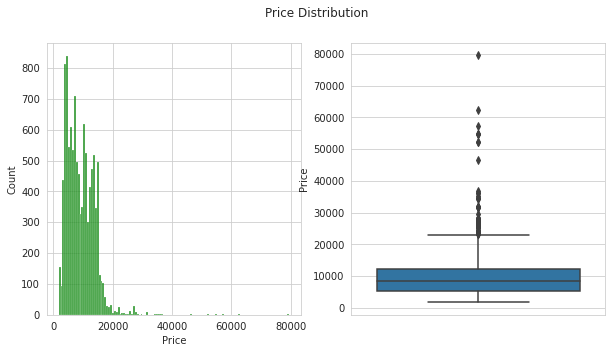

In [14]:
# 6) Finally, distribution of target (Price)
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x = 'Price', data = train_data, color = 'green', ax = ax[0])
sns.boxplot(y = 'Price', data = train_data, ax = ax[1])
fig.suptitle('Price Distribution')
plt.show()

### Relationships between Features and Price

In [15]:
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

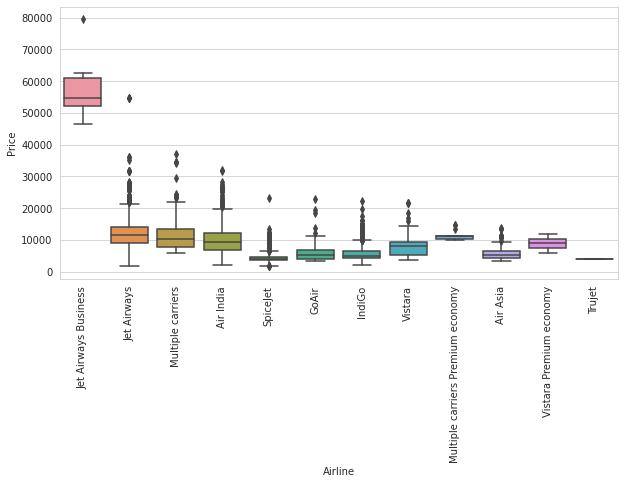

In [16]:
# 1) 'Price' vs. 'Airline'
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Airline', y = 'Price', data = train_data.sort_values(by = 'Price', ascending = False))
plt.xticks(rotation=90)
plt.show()
# All Airlines have similar means, medians, and modes except for JetAir Ways Business.
# It's shows as outliers in price (> 40k$):
# Jet Airways Business has only 6 values.

In [17]:
# Jet Airways Business has 6 values, they appear as outliers in price.
train_data['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

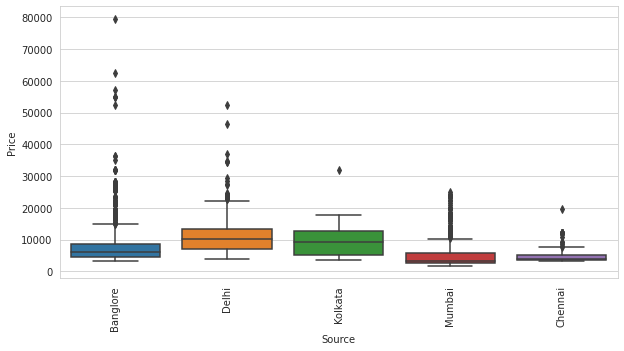

In [18]:
# 2) 'Price' vs. 'Source'
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'Source', y = 'Price', data = train_data.sort_values(by = 'Price', ascending = False))
plt.xticks(rotation=90)
plt.show()

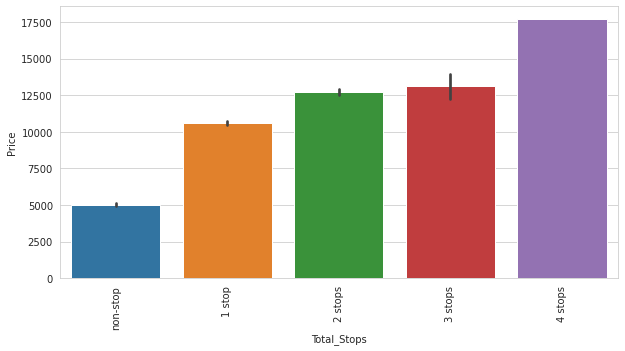

In [19]:
# Price vs. Total_Stops visualization
plt.figure(figsize=(10, 5))
categories_order = ['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']
sns.barplot(x = 'Total_Stops', y = 'Price', data = train_data.sort_values(by = 'Price', ascending = False),
           order = categories_order)
plt.xticks(rotation=90)
plt.show()

### EDA Summary:



1.   Jet Airways is the most preferred airline, followed by Indigo, and AirIndia.

2.   Majority of the flights take off from Delhi.Chennai has the minimum count of flight take-offs.

3.   Maximum flights land in Cochin.Kolkata has the lowest count of receiving the flights.

4.   Majority of the flights have stops as 1, flights with 3 and 4 stops are quite low.


5. The following columns can be dropped as they are of no use,
you will see why in the next section:
    
    ['year', 'Additional_Info', 'Route']

6. Price Column has Outliers, but I'll only consider the extremes which are above (40k$).

7. 'Price' goes up as 'Total_Stops' increase, this implies that Total_Stops is an ordinal variable.

## Data Preprocessing 

### Outliers Detection

Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points.

We'll impute these outliers with median.

In [20]:
# Replace outliers with median value
train_data['Price'] = np.where(train_data['Price'] > 40000, train_data['Price'].median(), train_data['Price'])

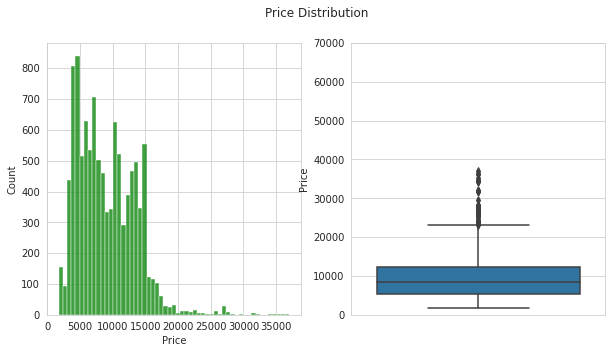

In [21]:
# Visualize Price after imputing outliers
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(x = 'Price', data = train_data, color = 'green', ax = ax[0])
sns.boxplot(y = 'Price', data = train_data, ax = ax[1])
# Set max_y limit to 70000
ax[1].set_ylim([0, 70000])
fig.suptitle('Price Distribution')
plt.show()

### 1) Training Data 

From .info(), We can see that all columns dtypes are **object**.

So lets start converting columns with date or time data to **datetime** in order to work properly with them.

Lets start with **'Journey_Date'** column and tackle them one by one.

In [22]:
# .dt.day to extract day of journey
train_data['Journey_day'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.day
train_data['Journey_month'] = pd.to_datetime(train_data.Date_of_Journey, format='%d/%m/%Y').dt.month
# There is no need to create 'Journey_year' because there is no jounrneys outside of 2019.

In [23]:
# Since we have converted 'Date_of_Journey' column into integers, we can drop it as it's of no use.
train_data.drop('Date_of_Journey', axis = 1, inplace = True)

In [24]:
# 'Dep_Time' is when a plane leaves the gate.
# 'Arrival_Time' is when a plane lands.
# Similar to 'Date_of_Journey', we can extract hours and minutes from them.

# Extracting Hours
train_data['Dep_hour'] = pd.to_datetime(train_data.Dep_Time).dt.hour
#Extracting Minutes
train_data['Dep_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

# Now we can drop 'Dep_Time' as it's of no use.
train_data.drop('Dep_Time', axis = 1, inplace = True)

In [25]:
# The same is done for 'Arrival_Time'
train_data['Arrival_hour'] = pd.to_datetime(train_data.Arrival_Time).dt.hour
train_data['Arrival_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop 'Arrival_Time' as it's of no use.
train_data.drop('Arrival_Time', axis = 1, inplace = True)

In [26]:
# 'Duration' is the time taken by plane to reach its Destination
# We need to extract hours and minutes from it
duration = list(train_data.Duration)

for i in range(len(duration)):
    if (len(duration[i].split(' ')) != 2): #check if duration is only hours or minutes
        if 'h' in duration[i]: # hours only
            duration[i] = duration[i] + ' 0m'
        else: # minutes only
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))  # extract only hours
    duration_minutes.append(int(duration[i].split(sep ='m')[0].split()[1])) # extract only mintues 

In [27]:
# Create new columns for duration hours and minutes
train_data['Duration_hour'] = duration_hours
train_data['Duration_min'] = duration_minutes
# Now we can drop 'Duration' column as it's of no use
train_data.drop('Duration', axis = 1, inplace = True)

In [28]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302.0,1,3,16,50,21,35,4,45


#### Handling Categorical Data

**We have two types of categorical data in general:**

1) Nominal Data : data does not have natural order or rank -->  use OneHotEncoder

2) Ordinal Data : data that have natural order or rank -->      use OrdinalEncoder

In [29]:
# As 'Airline' is categorical data, we will perform OneHotEncoding
Airline = train_data[['Airline']]
# drop_first = True drops the first dummy variable,
# because if all other dummy variables are 0's, this means our first
# dummy would have been 1, plus we reduced our number of features by 1.
Airline = pd.get_dummies(Airline, drop_first = True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
# As 'Source' is a nominal Categorical Data, we will perform OneHotEncoding
Source = train_data[['Source']]
Source = pd.get_dummies(Source, drop_first = True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [31]:
# Encode 'Destination' column as well
Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [32]:
# Next Categorical variable to look up is 'Route'
train_data['Route'].value_counts()

DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: Route, Length: 128, dtype: int64

In [33]:
# Next Categorical variable to look up is 'Additional_Info'
train_data['Additional_Info'].value_counts(normalize=True)

No info                         0.781127
In-flight meal not included     0.185546
No check-in baggage included    0.029957
1 Long layover                  0.001779
Change airports                 0.000655
Business class                  0.000374
No Info                         0.000281
1 Short layover                 0.000094
Red-eye flight                  0.000094
2 Long layover                  0.000094
Name: Additional_Info, dtype: float64

In [34]:
# We will also drop the 'Additional_Info' column
# since 78.11% of the data has No Info.
# Route and Total Stops represent the same thing
train_data.drop(['Route', 'Additional_Info'], axis = 1, inplace = True)

In [35]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897.0,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882.0,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218.0,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302.0,1,3,16,50,21,35,4,45


In [36]:
# Last categorical variable to look up
train_data['Total_Stops'].value_counts(normalize = True)

1 stop      0.526587
non-stop    0.326811
2 stops     0.142295
3 stops     0.004213
4 stops     0.000094
Name: Total_Stops, dtype: float64

In [37]:
# From EDA,
# Price goes up as number of stops increases.
# This means that 'Total_Stops' is an ordinal variable
# because the order has meaning.
total_stops_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}
# Encoding 'Total_Stops'
train_data['Total_Stops'] = train_data['Total_Stops'].map(total_stops_mapping)

In [38]:
train_data.Total_Stops.head(10)

0    0
1    2
2    2
3    1
4    1
5    0
6    1
7    1
8    1
9    1
Name: Total_Stops, dtype: int64

In [39]:
# Concacenate dataframes --> train_data, Airline, Source, Destination
train_data_full = pd.concat([train_data, Airline, Source, Destination], axis = 1)

In [40]:
# Drop unencoded categorical variables as they are of no use.
train_data_full.drop(['Airline', 'Source', 'Destination'], axis = 1, inplace = True)

In [41]:
# Look at full training data
print(train_data_full.info())
print('-' * 80)
print("Shape of train data : ",train_data_full.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Total_Stops                                10682 non-null  int64  
 1   Price                                      10682 non-null  float64
 2   Journey_day                                10682 non-null  int64  
 3   Journey_month                              10682 non-null  int64  
 4   Dep_hour                                   10682 non-null  int64  
 5   Dep_min                                    10682 non-null  int64  
 6   Arrival_hour                               10682 non-null  int64  
 7   Arrival_min                                10682 non-null  int64  
 8   Duration_hour                              10682 non-null  int64  
 9   Duration_min                               10682 non-null  int64  
 10  Airline_Air India     

### 2) Testing Data Preprocessing

To solve kaggle competitions, we had to merge our training and testing set 
then comeback and split them again later.

But in a real_world scenario, what do you think will happen if we combine train and test data
then do all the preprocessing steps on the combined dataset?

The reason we first do the training data preprocessing, then testing data preprocessing seperately
is because of --> **Data Leakage** 

We don't want to use some of our testingdata in training , because our model will be knowing some of the information about the test data.

**We will do the same preprocessing we did earlier on test data**

In [42]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hour"] = duration_hours
test_data["Duration_min"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data['Total_Stops'] = test_data['Total_Stops'].map(total_stops_mapping)

# Concatenate dataframe --> test_data + Airline + Source + Destination
test_data_full = pd.concat([test_data, Airline, Source, Destination], axis = 1)

test_data_full.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", test_data_full.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

## Feature Scaling

I will be using tree based classifiers which are rule-based algorithms, so they don't require feature scaling.
For more info on feature scaling,

Refer to: https://www.kaggle.com/getting-started/159643

## Feature Selection
is the process of reducing the number of input variables when developing a predictive model.

It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in some cases, to improve the performance of the model.

Following are some of the features selection methods:

**1) Heatmaps**

**2) feature_importances_**  with classifiers that have this method.

**3) SelectKBest**

In [43]:
train_data_full.shape

(10682, 30)

In [44]:
train_data_full.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [45]:
X = train_data_full.loc[:, ['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hour',
       'Duration_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
y = X['Price']
X.drop('Price', axis = 1, inplace = True)
print(X.head())

   Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            0           24              3        22       20             1   
1            2            1              5         5       50            13   
2            2            9              6         9       25             4   
3            1           12              5        18        5            23   
4            1            1              3        16       50            21   

   Arrival_min  Duration_hour  Duration_min  Airline_Air India  ...  \
0           10              2            50                  0  ...   
1           15              7            25                  1  ...   
2           25             19             0                  0  ...   
3           30              5            25                  0  ...   
4           35              4            45                  0  ...   

   Airline_Vistara Premium economy  Source_Chennai  Source_Delhi  \
0                             

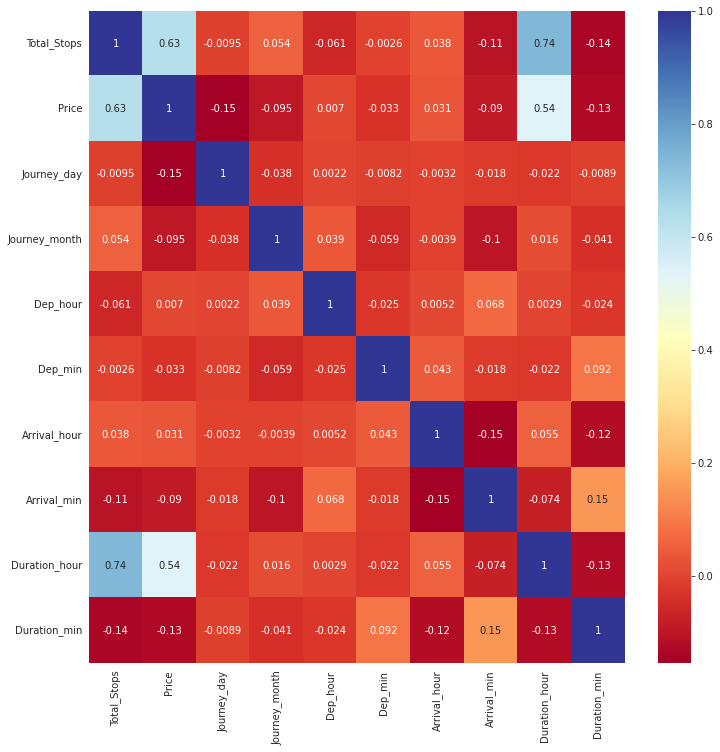

In [46]:
# 1) Heatmap
# Find correlations between independent features and dependent target
plt.figure(figsize = (12, 12))
# original
sns.heatmap(train_data.corr(), annot = True, cmap = 'RdYlBu')
plt.show()

In [47]:
# Using a baseline model to see what features are important
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X, y)

RandomForestRegressor(random_state=42)

In [48]:
# Show most important features according to regressor
print(rf_reg.feature_importances_)
# Not much to interpret from here, better visualize it. 

[3.52947032e-02 1.45749688e-01 6.14758350e-02 2.69800608e-02
 2.45664351e-02 2.93386666e-02 2.19866213e-02 4.78174393e-01
 1.93907900e-02 5.48995269e-03 1.28285373e-03 8.03497237e-03
 6.98781550e-02 2.72851600e-04 2.10933300e-02 9.56234619e-04
 3.05538139e-03 1.18427044e-05 3.71506465e-03 4.58150264e-05
 6.72370293e-04 2.72714269e-03 3.85106447e-03 4.16045318e-03
 2.84738163e-03 2.16445946e-04 3.90920024e-03 5.93416616e-04
 2.42288776e-02]


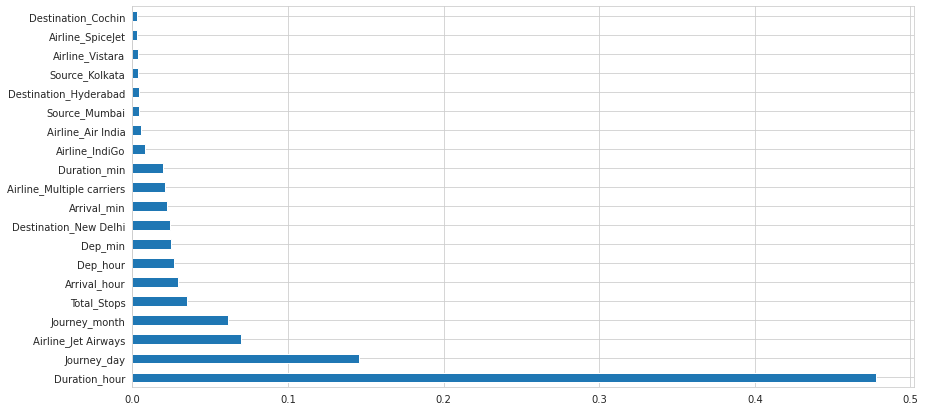

In [49]:
# Visualize features importances
plt.figure(figsize = (14, 7))
features_importances = pd.Series(rf_reg.feature_importances_, index = X.columns)
features_importances.nlargest(20).plot(kind = 'barh')
plt.show()

## Baseline Model Building and Validation

In [50]:
# Split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [51]:
# Evaluation metrics
def regression_scoring(truth, pred):
    print("R2 Score:{:.4f}".format(metrics.r2_score(truth, pred)))
    print("Mean Absolute Error: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))
    print("Mean Squared Error:{:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
    print("Root Mean Squared Error: {:.2f}".format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

### Random Forest Regressor

In [61]:
# Fit model on training data
rf_reg = RandomForestRegressor(random_state = 42)
rf_reg.fit(X_train, y_train)
# Predict on testing set
y_pred = rf_reg.predict(X_test)

In [62]:
# R2 Score for our baseline model (benchmark).
print("R2 Score on training set:",rf_reg.score(X_train, y_train))
print("R2 Score on testing set:",rf_reg.score(X_test, y_test))

R2 Score on training set: 0.9508539467671966
R2 Score on testing set: 0.8334025531938111


A **Distplot** or distribution plot, **represents the variation in the data distribution**. Seaborn Distplot represents the overall distribution of continuous data variables.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


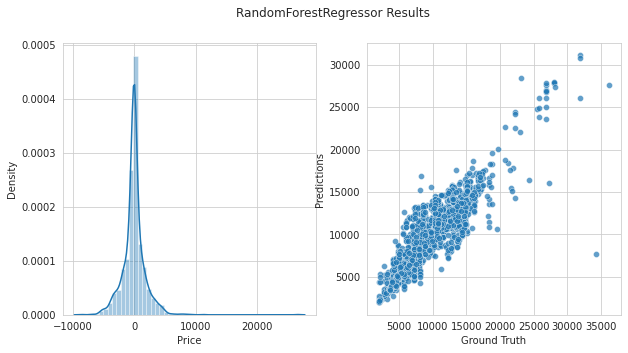

In [86]:
# Plot the difference between Predictions and ground truth
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
sns.distplot(y_test - y_pred, ax = ax[0]) # basically a hisogram
sns.scatterplot(x = y_test, y= y_pred, alpha = 0.7, ax = ax[1])
fig.subplots_adjust(hspace = 1)
fig.suptitle('RandomForestRegressor Results')
ax[1].set_xlabel('Ground Truth')
ax[1].set_ylabel('Predictions')
plt.show()

In [59]:
regression_scoring(y_test, y_pred)
# Say Mean Absolute Error = 10 implies that, on average the prediction distance from true value
# is 10 (True values = 200 --> Prediction = 190 or True values = 200 --> Prediction = 210).

R2 Score:0.8334
Mean Absolute Error: 1153.82
Mean Squared Error:3411877.58
Root Mean Squared Error: 1847.13


### Gradient Boosting Regressor

In [60]:
gb_reg = GradientBoostingRegressor(random_state = 42)
gb_reg.fit(X_train, y_train)
# Predicting on testing set
y_pred = rf_reg.predict(X_test)

GradientBoostingRegressor(random_state=42)

In [64]:
# R2 Score for our baseline model (benchmark).
print("R2 Score on training set:",gb_reg.score(X_train, y_train))
print("R2 Score on testing set:",gb_reg.score(X_test, y_test))

R2 Score on training set: 0.7812161092733629
R2 Score on testing set: 0.7761633929016983


In [65]:
regression_scoring(y_test, y_pred)
# Say Mean Absolute Error = 10 implies that, on average the prediction distance from true value
# is 10 (True values = 200 --> Prediction = 190 or True values = 200 --> Prediction = 210).

R2 Score:0.8334
Mean Absolute Error: 1153.82
Mean Squared Error:3411877.58
Root Mean Squared Error: 1847.13


## Hyperparameters Tuning 

* Choose any of the following methods for tuning:
    1. RandomizedSearchCV --> Fast
    2. GridSearchCV


* Make your hyperparameters grid in form of dictionary


* Fit the model


* Check the best parameters and score

### RandomForestRegressor Tuning

In [72]:
# I will be using randomized Search CV.
# Parameters Grid

# number of trees in random forest
n_estimators = [100, 130, 160, 200, 230]
# number of features to consider at each split
max_features = ['auto', 'sqrt']
# max. number of levels in the tree
max_depth = [5, 10, 15, 20]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Create the random grid
random_grid_1 = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [83]:
# Random Search of parameters  
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid_1, n_iter = 10,
                                cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the model
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 130, 160, 200,
                                                         230]},
                   random_state=42, verbose=2)

In [74]:
# Extract best parameters
best_params_1 = rf_random.best_params_
print(best_params_1)

{'n_estimators': 230, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [82]:
# Scoring Our Final Results for Random Forest
predictions_1 = rf_random.predict(X_test)
regression_scoring(y_test, predictions_1)
# So R2 Score improved by 1.5%.

NotFittedError: ignored

### GradientBoostingRegressor Tuning

In [76]:
# I will be using randomizedSearchCV here also
# Parameters Grid

# number of trees in random forest
n_estimators = [100, 150, 180, 200, 220]
# number of features to consider at each split
n_features = train_data_full.shape[1]
max_features = ['auto', 'sqrt', n_features/3]
# max. number of levels in the tree
max_depth = [5, 10, 15, 20, 25]
# minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15]
# minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10, 15]
# Create the random grid
random_grid_2 = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [79]:
# Random Search of parameters  
gb_random = RandomizedSearchCV(estimator = gb_reg, param_distributions = random_grid_2, n_iter = 10,
                                cv = 5, verbose = 2, random_state = 42, n_jobs = -1)
# Fit the model
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 525, in fit
    self._check_params()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py", line 357, in _check_params
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0,

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25],
                                        'max_features': ['auto', 'sqrt', 10.0],
                                        'min_samples_leaf': [1, 2, 5, 10, 15],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [100, 150, 180, 200,
                                                         220]},
                   random_state=42, verbose=2)

In [80]:
# Extract best parameters
best_params_2 = gb_random.best_params_
print(best_params_2)

{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 10}


In [85]:
# Scoring Our Final Results for Gradinet Boosting
predictions_2 = gb_random.predict(X_test)
regression_scoring(y_test, predictions_2)
# R2 Score is higher by 1% for GradientBoosting regressor than RandomForestRegressor

R2 Score:0.8522
Mean Absolute Error: 1153.82
Mean Squared Error:3411877.58
Root Mean Squared Error: 1847.13


## Understanding Our results
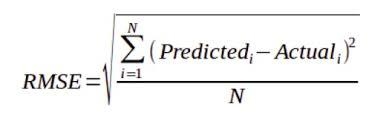

RMSE is the average distance between actual values and predictions?


Q : **So, what is considered a good RMSE?**

A : **It depends**

The lower the RMSE, the better a given model is able to fit the dataset.However,
the range of the dataset you’re working with is important in determining whether or not a given RMSE value is **“low”** or not.

Consider the two following scenarios:


1.   Scenario 1: We would like to use a regression model predict the price of homes in a certain city. Suppose the model has an RMSE value of $500. Since the typical range of houses prices is between $70,000 and $300,000, this RMSE value is extremely low. This tells us that the model is able to predict house prices accurately.


2.   Scenario 2: Now suppose we would like to use a regression model to predict how much someone will spend per month in a certain city. Suppose the model has an RMSE value of $500. If the typical range of monthly spending is $1,500 – $4,000, this RMSE value is quite high. This tells us that the model is not able to predict monthly spending very accurately.

One way to measure if RMSE if 'low' or not is by normalizing it:

Normalized RMSE = RMSE / (Max. value - Min. value)

**This produces a value between 0 and 1, where values closer to 0 represent better fitting models.**



In [ ]:
# Min. and Max. Price in our data
min_price = np.min(y)
max_price = np.max(y)
range = max_price - min_price
# print values
print()
print("Min. ticket Price = {}, Max. tickey Price = {}".format(min_price, max_price))
normalized_RMSE = 1847.13 / range # 2089.37 is obtained by regression_scoring() function

print("normalized RMSE:", normalized_RMSE)


Min. ticket Price = 1759.0, Max. tickey Price = 36983.0
normalized RMSE: 0.05931665909607086


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


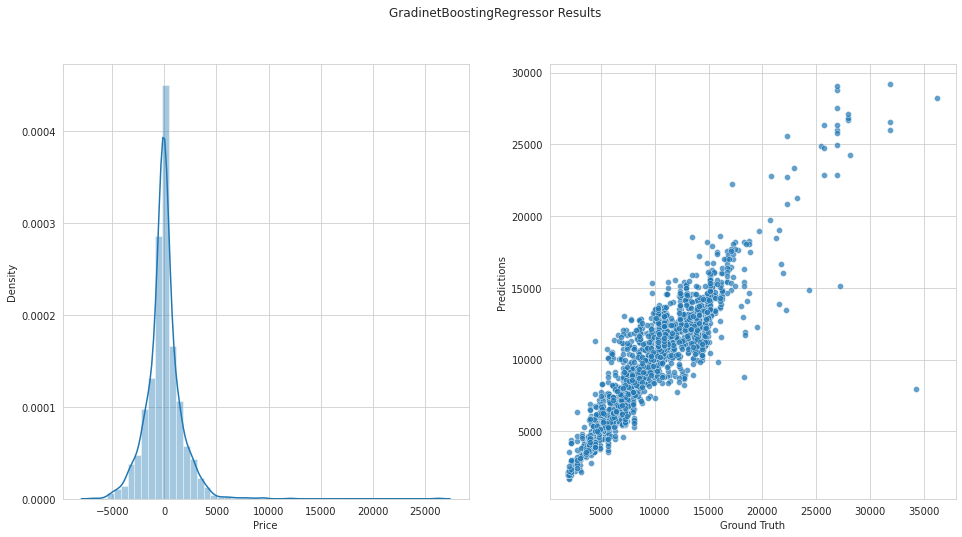

In [89]:
# Plot the difference between Predictions and ground truth
fig, ax = plt.subplots(1, 2, figsize = (16, 8))
sns.distplot(y_test - predictions_2, ax = ax[0]) # basically a hisogram
sns.scatterplot(x = y_test, y= predictions_2, alpha = 0.7, ax = ax[1])
fig.subplots_adjust(hspace = 1)
fig.suptitle('GradinetBoostingRegressor Results')
ax[1].set_xlabel('Ground Truth')
ax[1].set_ylabel('Predictions')
plt.show()

## Save the model


In [90]:
import joblib
# open a file where you want to store the data
file_name_1 = 'randomforest_reg_v5.pkl'
file_name_2 = 'gradientboosting_reg_v5.pkl'
joblib.dump(rf_reg, file_name_1)
joblib.dump(gb_reg, file_name_2)

['gradientboosting_reg_v5.pkl']

## Final Thoughts

#### How to improve model performance
1.   Outliers detection             --> Done
2.   Trying a more powerful model   --> Done
3.   Adding new features            --> next version of notebook   


In the upcoming version of the notebook, I will try to introduce new features such as : 


    *   the day of the week the journey was made
    *   if that day was holiday or week day
    *   Inspect the Route feature a bit more in depth, maybe the sequence of
        routes affects the flight price somehow.